# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [53]:
# Code Here
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
penguins.head()
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
#dummies = pd.get_dummies(penguins[["species", "island", "sex"]])
#penguins = pd.concat([penguins, dummies], axis=1)
#penguins.head()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
penguins = penguins.dropna()
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [57]:
data = []

In [58]:
# depth ~ sex + flipper_length
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["flipper_length_mm"])

    ],
  remainder = "drop")

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

data.append({
    "Model": 1,
    "test_MSE": mean_squared_error(y_test, test_pred),
    "train_MSE": mean_squared_error(y_train, train_pred)
})


In [59]:
# depth ~ sex + island + flipper length  +
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "body_mass_g"])

    ],
  remainder = "drop")

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

data.append({
    "Model": 2,
    "test_MSE": mean_squared_error(y_test, test_pred),
    "train_MSE": mean_squared_error(y_train, train_pred)
})
#if you want add more just copy and paste and jut add more columns

In [60]:
# depth ~ sex + island + flipper length
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island", "species"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "body_mass_g"])

    ],
  remainder = "drop")

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

data.append({
    "Model": 3,
    "test_MSE": mean_squared_error(y_test, test_pred),
    "train_MSE": mean_squared_error(y_train, train_pred)
})
#if you want add more just copy and paste and jut add more columns

In [61]:
# depth ~ sex + island + flipper length
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island", "species"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "body_mass_g"]),
    ("degree", PolynomialFeatures(degree = 2), ["flipper_length_mm", "body_mass_g"])

    ],
  remainder = "drop")

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

data.append({
    "Model": 4,
    "test_MSE": mean_squared_error(y_test, test_pred),
    "train_MSE": mean_squared_error(y_train, train_pred)
})
#if you want add more just copy and paste and jut add more columns

In [62]:
from plotnine import ggplot, aes, geom_line, labs
df = pd.DataFrame(data)
df

,Model,test_MSE,train_MSE
0,1,1.361289,1.490702
1,2,1.116803,1.196558
2,3,0.720428,0.589828
3,4,0.689799,0.580471


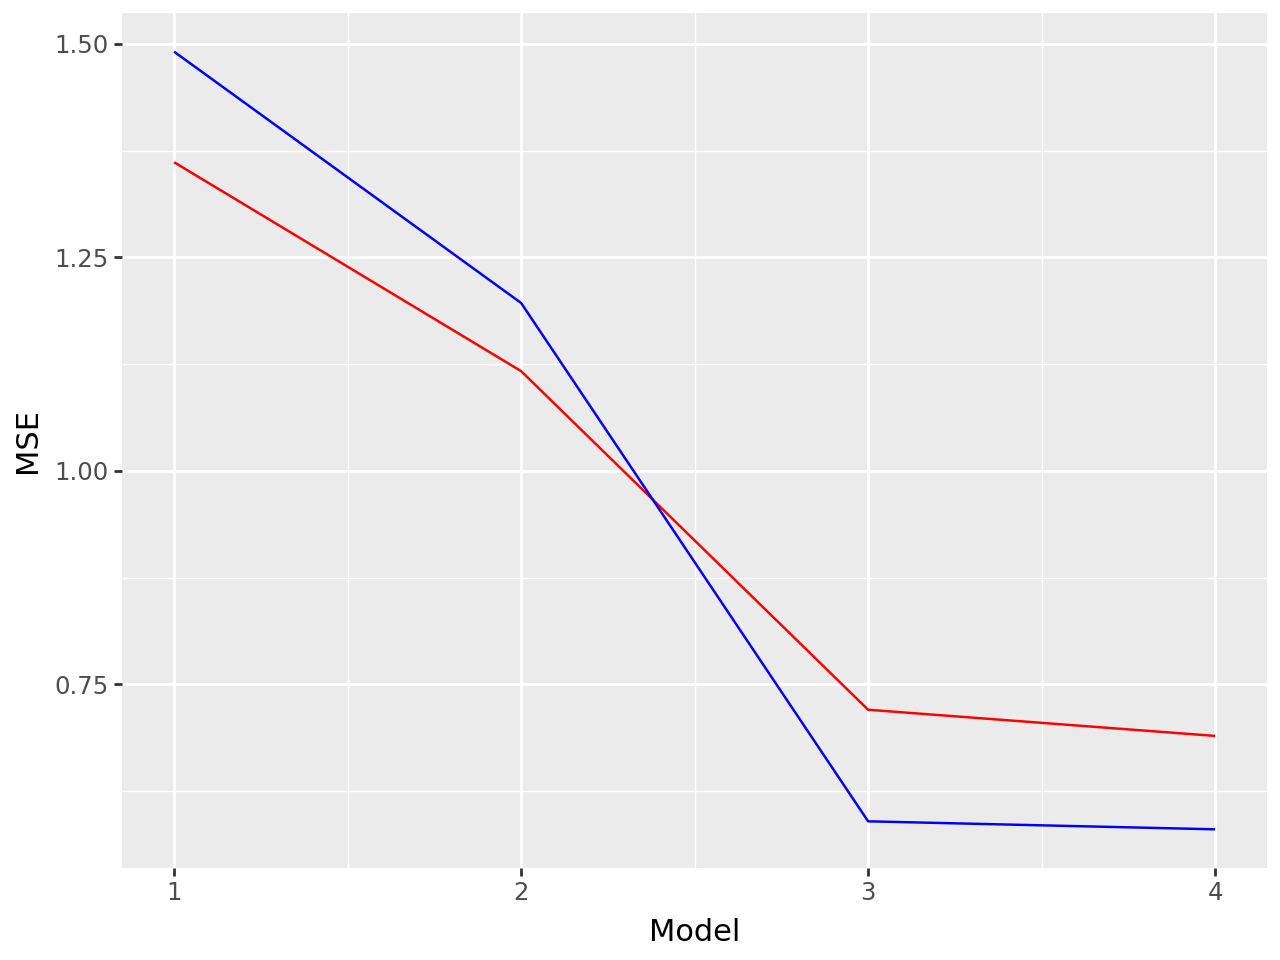

In [63]:
(ggplot(df, aes(x = "Model"))
+ geom_line(aes(y = "test_MSE"), color = "red")
+ geom_line(aes(y = "train_MSE"), color = "blue")
+ labs(x = "Model", y = "MSE"))

Model 4 is my best model, it has the lowest MSE so we would likely use that one to make predictions.


Class Notes:

In [64]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [65]:
lr = LinearRegression()


ames = pd.read_csv("/content/AmesHousing.csv")
X = ames[["Gr Liv Area", "TotRms AbvGrd"]]
y = ames["SalePrice"]



X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_s = (X_train - X_train.mean())/X_train.std()

lr_fitted = lr.fit(X_train_s, y_train)
lr_fitted.coef_

FileNotFoundError: [Errno 2] No such file or directory: '/content/AmesHousing.csv'

In [ ]:
y_preds = lr_fitted.predict(X_test)

r2_score(y_test, y_preds)

In [ ]:
y_preds[1:5]

In [ ]:
new_house = pd.DataFrame(data = {"Gr Liv Area": [889], "TotRms AbvGrd": [6]})
new_house

In [ ]:
new_house_s = (new_house - new_house.mean())/new_house.std()
new_house_s

In [ ]:
X_test_s = (X_test - X_train.mean())/X_train.std()
y_preds = lr_fitted.predict(X_test_s)

r2_score(y_test, y_preds)

In [ ]:
new_house_s = (new_house - X_train.mean())/X_train.std()
lr_fitted.predict(new_house_s)

In [ ]:
lr_pipeline = Pipeline(
  [StandardScaler(),
  LinearRegression()]
)



In [ ]:
lr_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

In [ ]:
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)

y_preds = lr_pipeline_fitted.predict(X_test)
r2_score(y_test, y_preds)

In [ ]:
lr_pipeline_fitted.predict(new_house)

In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop"
)
#remainder drop means any columns we are not calling to drop those columns and not use them

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Practice:
Consider four possible models for predicting house prices:

Using only the size and number of rooms.
Using size, number of rooms, and building type.
Using size and building type, and their interaction.
Using a 5-degree polynomial on size, a 5-degree polynomial on number of rooms, and also building type.
Set up a pipeline for each of these four models.

Then, get predictions on the test set for each of your pipelines, and compute the root mean squared error. Which model performed best?

In [ ]:
X = ames.drop("SalePrice", axis = 1)
y = ames["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
ct1 = ColumnTransformer(
  [
    #("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop"
)
#remainder drop means any columns we are not calling to drop those columns and not use them

lr_pipeline1 = Pipeline(
  [("preprocessing", ct1),
  ("linear_regression", LinearRegression())]
)

lr_pipeline1


In [ ]:
X_train

In [ ]:
ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop"
)
#remainder drop means any columns we are not calling to drop those columns and not use them

lr_pipeline2 = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
)

lr_pipeline2


In [ ]:
ct3 = ColumnTransformer(
  [("dummify", OneHotEncoder(sparse_output = False), ["Bldg Type"]),
    ("standardize", StandardScaler(), ["Gr Liv Area"])
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct3.fit_transform(X_train)


In [ ]:
ct_inter = ColumnTransformer(
  [
    ("interaction", PolynomialFeatures(interaction_only = True), ["remainder__TotRms AbvGrd", "dummify__Bldg Type_1Fam"])
    ,
  ],
  remainder = "drop"
).set_output(transform = "pandas")


lr_pipeline3 = Pipeline(
  [("preprocessing", ct3),
    ("preprocessing", ct_inter),
  ("linear_regression", LinearRegression())])
lr_pipeline3